In [1]:
# Install Libraries
#!pip install textblob
#!pip install tweepy

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
# Authentication using keys obtained from Twitter Developer Account
consumerKey = 'mZubbqbPgNCd0rUGY3DRfYdPA'
consumerSecret = 'wlVMQRdoO7KJlzDV4bHPcia2Jbwp6Q7MfVbj5jjbeGaiugvKwI'
accessToken = '492588059-0ZsRbrHjPvGK8iQkzNgs3sdAOJIFgWW0ps6XAa3A'
accessTokenSecret = 'yai3c95PHHUB8VhoRwejW58ph4AFjLZ6kxbe8RlVxI7KA'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [4]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze:"))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  Voyager Digital
Please enter how many tweets to analyze: 4000


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1503
positive number:  585
negative number:  77
neutral number:  841


In [6]:
tweet_list

,0
0,RT @selectionas: Looking good! 💯🚀 https://t.co...
1,RT @decryptmedia: Crypto trading broker Voyage...
2,Un aficionado de los Dallas Mavericks gana USD...
3,After a sequence of rounds at a shooting event...
4,RT @investvoyager: Make money on your money wi...
...,...
1498,RT @PatrickAckerman: $VGX $VYGVF https://t.co/...
1499,RT @MarketRebels: Voyager Digital Becomes the ...
1500,RT @investvoyager: Make money on your money wi...
1501,RT @investvoyager: Make money on your money wi...


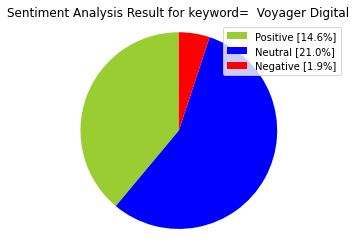

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @selectionas: Looking good! 💯🚀 https://t.co...,RT @selectionas: Looking good! 💯🚀 https://t.co...
1,RT @decryptmedia: Crypto trading broker Voyage...,RT @decryptmedia: Crypto trading broker Voyage...
2,Un aficionado de los Dallas Mavericks gana USD...,Un aficionado de los Dallas Mavericks gana USD...
3,After a sequence of rounds at a shooting event...,After a sequence of rounds at a shooting event...
4,RT @investvoyager: Make money on your money wi...,RT @investvoyager: Make money on your money wi...
...,...,...
1489,RT @DrBurkenstock: You're telling me you don't...,RT @DrBurkenstock: You're telling me you don't...
1490,$VYGVF Stock Alert: The Dallas Mavericks Just ...,$VYGVF Stock Alert: The Dallas Mavericks Just ...
1491,@MarketRebels Voyager Digital! Just watch the ...,@MarketRebels Voyager Digital! Just watch the ...
1497,@phil_hellmuth Have you heard of voyager digit...,@phil_hellmuth Have you heard of voyager digit...


In [10]:
tweet_list

,0,text
0,RT @selectionas: Looking good! 💯🚀 https://t.co...,RT @selectionas: Looking good! 💯🚀 https://t.co...
1,RT @decryptmedia: Crypto trading broker Voyage...,RT @decryptmedia: Crypto trading broker Voyage...
2,Un aficionado de los Dallas Mavericks gana USD...,Un aficionado de los Dallas Mavericks gana USD...
3,After a sequence of rounds at a shooting event...,After a sequence of rounds at a shooting event...
4,RT @investvoyager: Make money on your money wi...,RT @investvoyager: Make money on your money wi...
...,...,...
1489,RT @DrBurkenstock: You're telling me you don't...,RT @DrBurkenstock: You're telling me you don't...
1490,$VYGVF Stock Alert: The Dallas Mavericks Just ...,$VYGVF Stock Alert: The Dallas Mavericks Just ...
1491,@MarketRebels Voyager Digital! Just watch the ...,@MarketRebels Voyager Digital! Just watch the ...
1497,@phil_hellmuth Have you heard of voyager digit...,@phil_hellmuth Have you heard of voyager digit...


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @selectionas: Looking good! 💯🚀 https://t.co...,looking good
1,RT @decryptmedia: Crypto trading broker Voyage...,crypto trading broker voyager digital has str...
2,Un aficionado de los Dallas Mavericks gana USD...,un aficionado de los dallas mavericks gana usd...
3,After a sequence of rounds at a shooting event...,after a sequence of rounds at a shooting event...
4,RT @investvoyager: Make money on your money wi...,make money on your money with voyager join t...
5,เมื่อวันพุธที่ผ่านมา Voyager Digital ได้ทำข้อต...,voyager digital ...
6,"แฟนทีม Dallas Mavericks ชนะรางวัล 100,000 ดอลล...",dallas mavericks 100 000 ...
7,"Isaiah Stone ganó USD 100,000 en Bitcoin en un...",isaiah stone gan usd 100 000 en bitcoin en un...
8,RT @Cointelegraph: What an achievement! Fan wi...,what an achievement fan wins bitcoin worth ...
11,"A Dallas Mavericks fan won $100,000 in Bitcoin...",a dallas mavericks fan won 100 000 in bitcoin...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @selectionas: Looking good! 💯🚀 https://t.co...,looking good,0.700000,0.600000,positive,0.000,0.256,0.744,0.4404
1,RT @decryptmedia: Crypto trading broker Voyage...,crypto trading broker voyager digital has str...,0.000000,0.000000,negative,0.125,0.875,0.000,-0.2500
2,Un aficionado de los Dallas Mavericks gana USD...,un aficionado de los dallas mavericks gana usd...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,After a sequence of rounds at a shooting event...,after a sequence of rounds at a shooting event...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @investvoyager: Make money on your money wi...,make money on your money with voyager join t...,0.166667,0.166667,positive,0.000,0.749,0.251,0.5719
5,เมื่อวันพุธที่ผ่านมา Voyager Digital ได้ทำข้อต...,voyager digital ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,"แฟนทีม Dallas Mavericks ชนะรางวัล 100,000 ดอลล...",dallas mavericks 100 000 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"Isaiah Stone ganó USD 100,000 en Bitcoin en un...",isaiah stone gan usd 100 000 en bitcoin en un...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @Cointelegraph: What an achievement! Fan wi...,what an achievement fan wins bitcoin worth ...,0.200000,0.100000,positive,0.000,0.603,0.397,0.7845
11,"A Dallas Mavericks fan won $100,000 in Bitcoin...",a dallas mavericks fan won 100 000 in bitcoin...,0.000000,0.000000,positive,0.000,0.727,0.273,0.7184


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,571,67.73
positive,250,29.66
negative,22,2.61


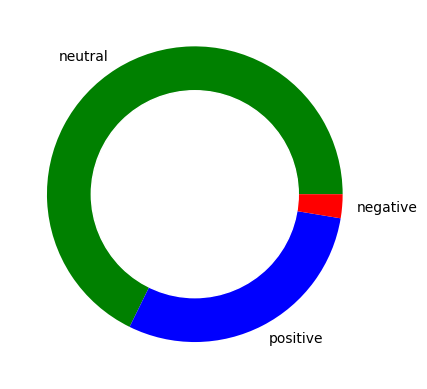

In [16]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


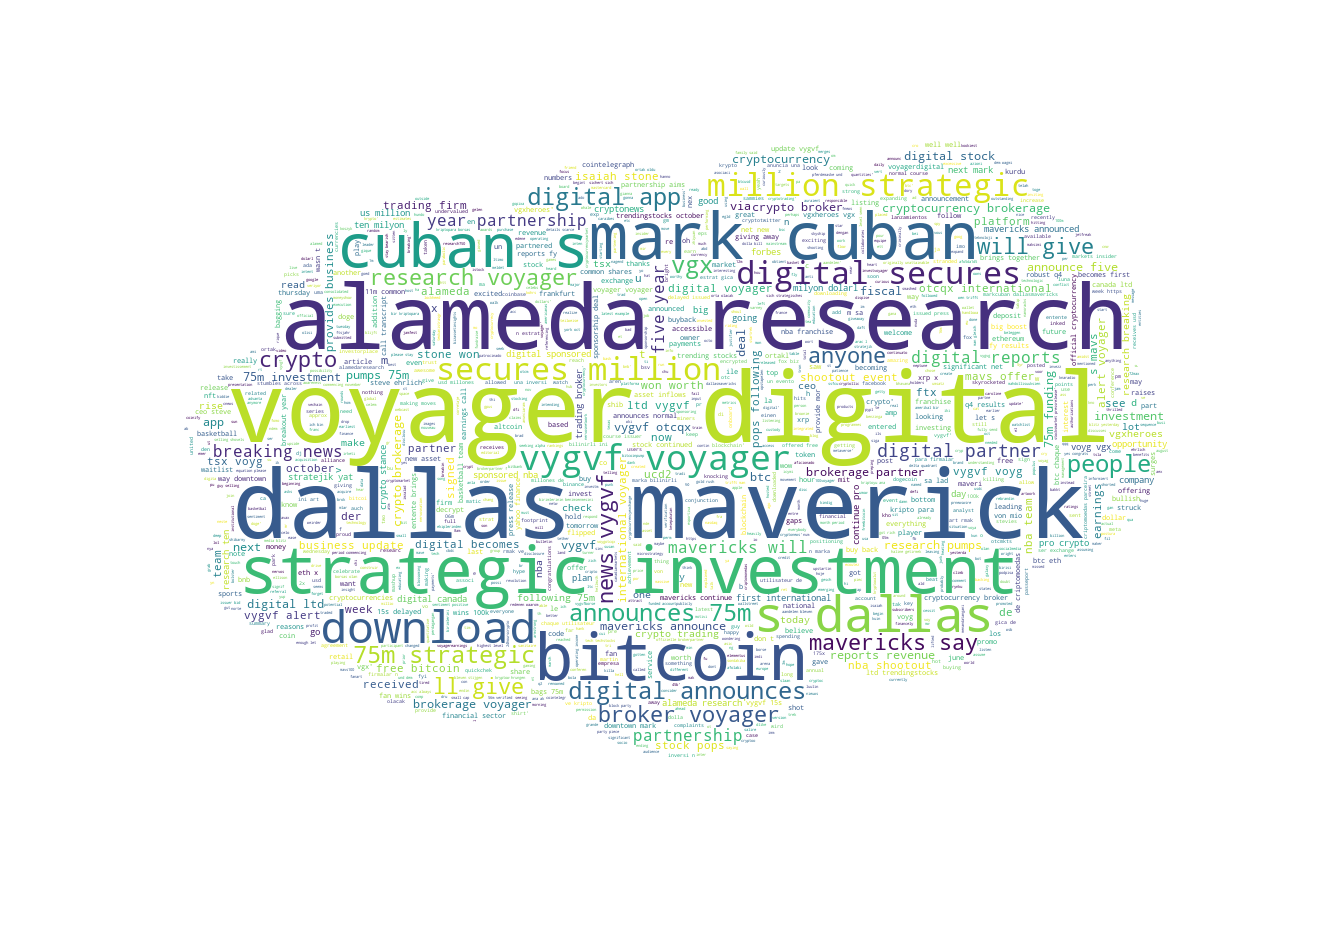

In [18]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


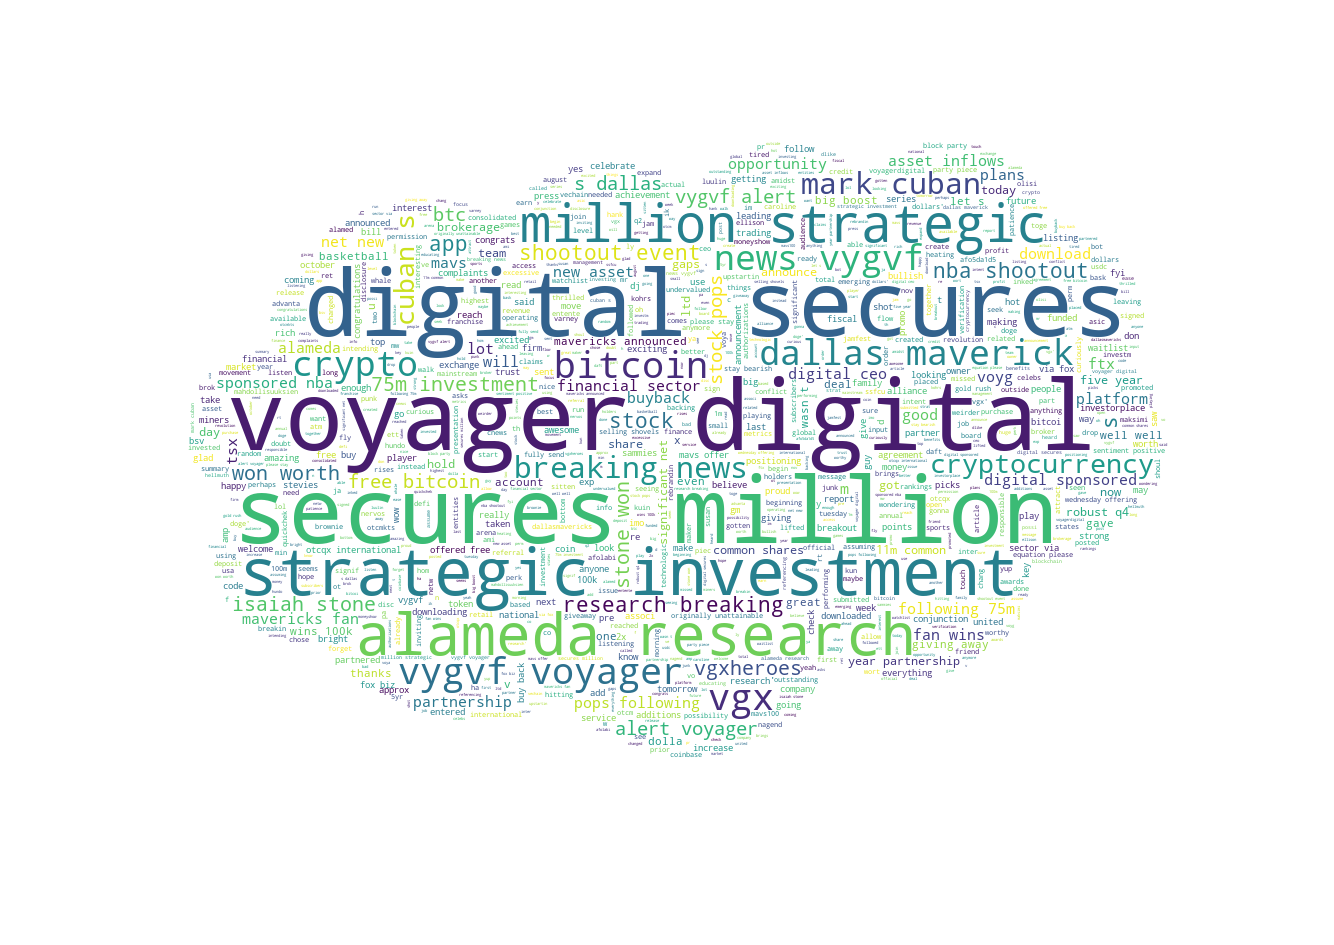

In [19]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


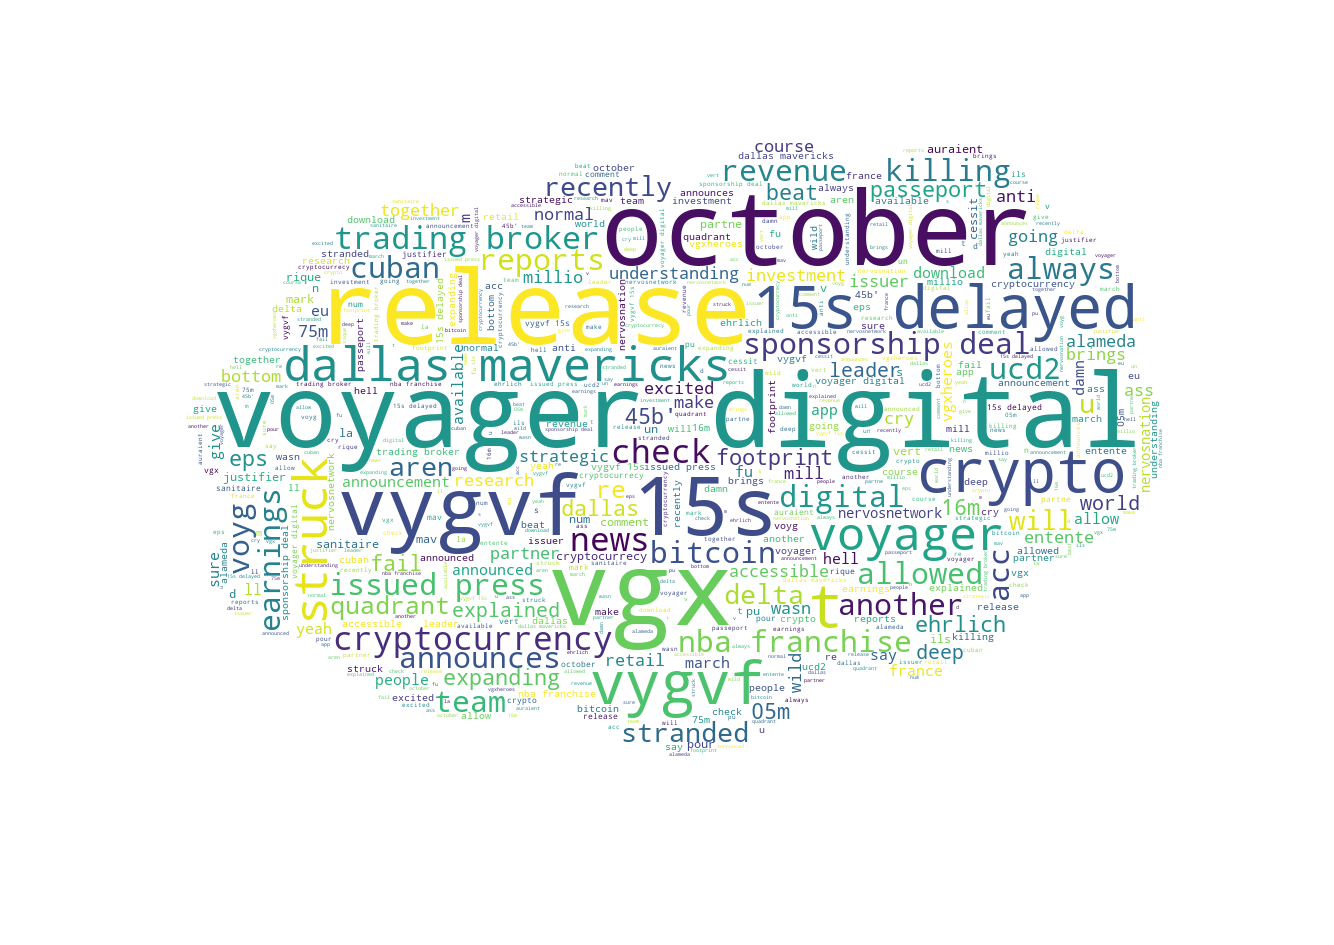

In [20]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


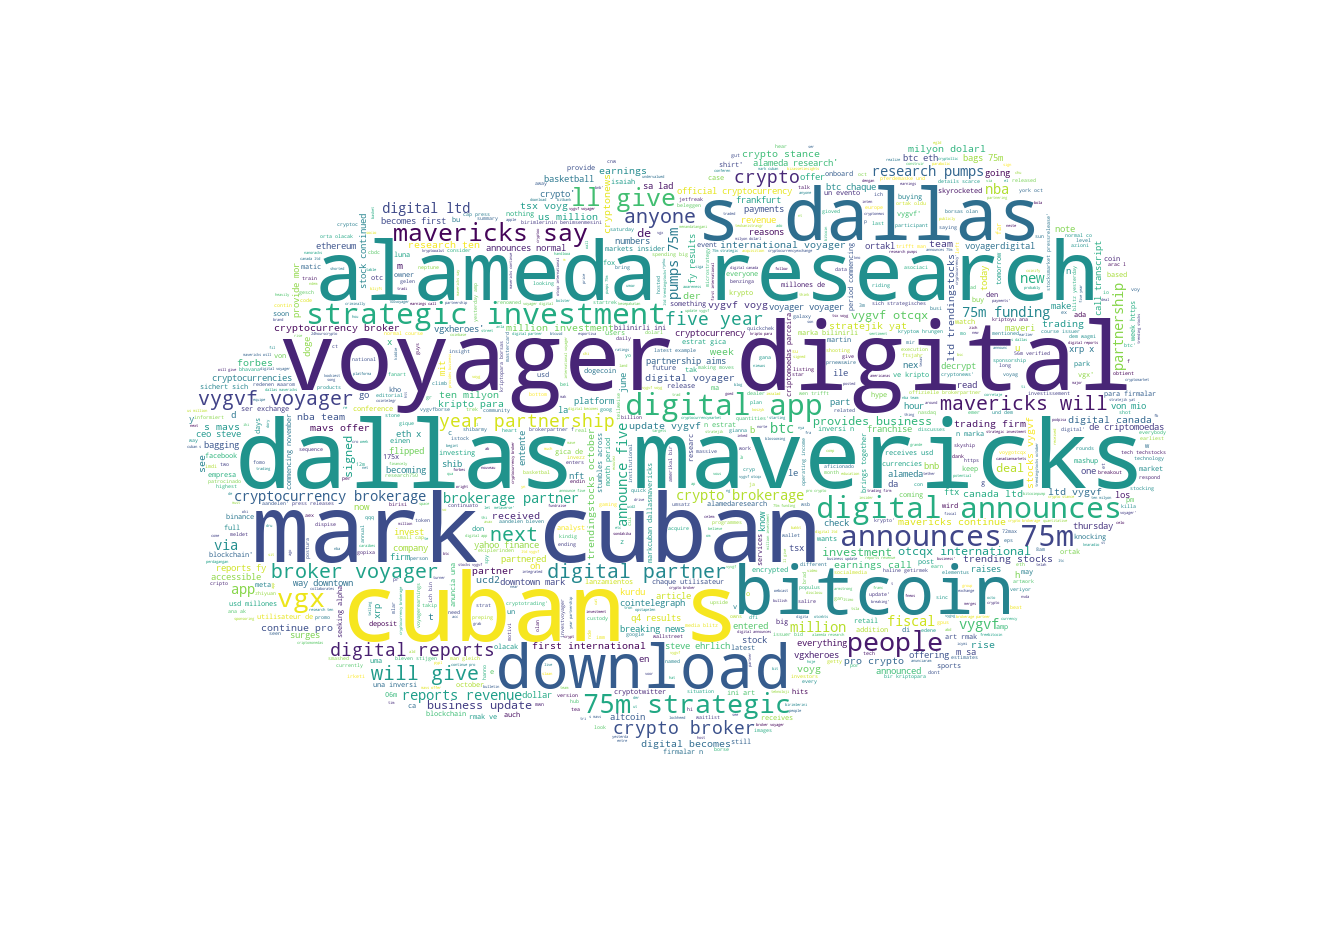

In [21]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [22]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [23]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,107.73
neutral,86.90
positive,96.53


In [24]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.05
neutral,12.78
positive,14.56


In [25]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [26]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [27]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [28]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [29]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [39]:
tw_list.head(100)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @selectionas: Looking good! 💯🚀 https://t.co...,looking good,0.700000,0.600000,positive,0.000,0.256,0.744,0.4404,19,2,looking good,"[, looking, good, ]","[, looking, good, ]","[, look, good, ]"
1,RT @decryptmedia: Crypto trading broker Voyage...,crypto trading broker voyager digital has str...,0.000000,0.000000,negative,0.125,0.875,0.000,-0.2500,111,16,crypto trading broker voyager digital has str...,"[, crypto, trading, broker, voyager, digital, ...","[, crypto, trading, broker, voyager, digital, ...","[, crypto, trade, broker, voyag, digit, struck..."
2,Un aficionado de los Dallas Mavericks gana USD...,un aficionado de los dallas mavericks gana usd...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,118,22,un aficionado de los dallas mavericks gana usd...,"[un, aficionado, de, los, dallas, mavericks, g...","[un, aficionado, de, los, dallas, mavericks, g...","[un, aficionado, de, lo, dalla, maverick, gana..."
3,After a sequence of rounds at a shooting event...,after a sequence of rounds at a shooting event...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,118,19,after a sequence of rounds at a shooting event...,"[after, a, sequence, of, rounds, at, a, shooti...","[sequence, rounds, shooting, event, hosted, cr...","[sequenc, round, shoot, event, host, crypto, t..."
4,RT @investvoyager: Make money on your money wi...,make money on your money with voyager join t...,0.166667,0.166667,positive,0.000,0.749,0.251,0.5719,122,21,make money on your money with voyager join t...,"[, make, money, on, your, money, with, voyager...","[, make, money, money, voyager, join, financia...","[, make, money, money, voyag, join, financi, r..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,@Traderhankhill Here's on Mr. Hank vygvf voyag...,here s on mr hank vygvf voyager digital lo...,0.100000,0.153333,positive,0.000,0.861,0.139,0.4404,104,21,here s on mr hank vygvf voyager digital lo...,"[, here, s, on, mr, hank, vygvf, voyager, digi...","[, mr, hank, vygvf, voyager, digital, lot, goo...","[, mr, hank, vygvf, voyag, digit, lot, good, n..."
169,Voyager Digital Ltd. (VYGVF) CEO Steve Ehrlich...,voyager digital ltd vygvf ceo steve ehrlich...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,110,16,voyager digital ltd vygvf ceo steve ehrlich...,"[voyager, digital, ltd, vygvf, ceo, steve, ehr...","[voyager, digital, ltd, vygvf, ceo, steve, ehr...","[voyag, digit, ltd, vygvf, ceo, steve, ehrlich..."
170,Doubt this will reach ya like this but worth a...,doubt this will reach ya like this but worth a...,0.300000,0.100000,positive,0.098,0.615,0.288,0.3400,82,16,doubt this will reach ya like this but worth a...,"[doubt, this, will, reach, ya, like, this, but...","[doubt, reach, ya, like, worth, shot, check, v...","[doubt, reach, ya, like, worth, shot, check, v..."
171,https://t.co/VPsk0zizxT,,0.000000,0.000000,neutral,0.000,0.000,0.000,0.0000,1,0,,"[, ]","[, ]","[, ]"


In [33]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
voyag,695
digit,632
dalla,234
maverick,231
alameda,222
research,214
invest,205
vygvf,200
strateg,166
cuban,162


In [34]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('voyager digital', 616),
 ('dallas mavericks', 225),
 ('alameda research', 210),
 ('investment alameda', 165),
 ('strategic investment', 162),
 ('mark cuban', 157),
 ('cuban dallas', 121),
 ('75 million', 101),
 ('100 bitcoin', 95),
 ('digital secures', 85),
 ('secures 75', 84),
 ('million strategic', 84),
 ('vygvf voyager', 79),
 ('digital announces', 78),
 ('75m strategic', 78),
 ('digital app', 77),
 ('announces 75m', 74),
 ('download voyager', 55),
 ('bitcoin people', 42),
 ('people download', 42)]